In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [5]:
from tensorflow.keras.layers import Dense, Dropout, Input, Flatten, Conv2D, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model

In [6]:
cifar10=tf.keras.datasets.cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train,x_test=x_train/255.0,x_test/255.0
y_train,y_test=y_train.flatten(),y_test.flatten()

170500096/170498071 [==============================] - 2053s 12us/step


In [13]:
x_train.shape

(50000, 32, 32, 3)

In [7]:
K=len(set(y_test))

In [8]:
print("Number of classses: ",K)

Number of classses:  10


In [9]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i,x)

In [ ]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [8]:
r = model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=10)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 19s 377us/sample - loss: 1.3320 - accuracy: 0.5296 - val_loss: 1.0480 - val_accuracy: 0.6311
Epoch 2/10
50000/50000 [==============================] - 14s 283us/sample - loss: 0.9221 - accuracy: 0.6749 - val_loss: 0.9073 - val_accuracy: 0.6853
Epoch 3/10
50000/50000 [==============================] - 15s 294us/sample - loss: 0.7755 - accuracy: 0.7301 - val_loss: 0.8347 - val_accuracy: 0.7114
Epoch 4/10
50000/50000 [==============================] - 14s 290us/sample - loss: 0.6800 - accuracy: 0.7632 - val_loss: 0.6962 - val_accuracy: 0.7596
Epoch 5/10
50000/50000 [==============================] - 14s 284us/sample - loss: 0.6033 - accuracy: 0.7903 - val_loss: 0.6855 - val_accuracy: 0.7663
Epoch 6/10
50000/50000 [==============================] - 14s 282us/sample - loss: 0.5387 - accuracy: 0.8115 - val_loss: 0.7677 - val_accuracy: 0.7468
Epoch 7/10
50000/50000 [====================

In [9]:
print("Training result: ",model.evaluate(x_train,y_train))
print("Testing result: ",model.evaluate(x_test,y_test))

50000/50000 [==============================] - 6s 118us/sample - loss: 0.2659 - accuracy: 0.9105
Training result:  [0.2659474713778496, 0.91052]
10000/10000 [==============================] - 1s 111us/sample - loss: 0.6947 - accuracy: 0.7804
Testing result:  [0.6946765422821045, 0.7804]


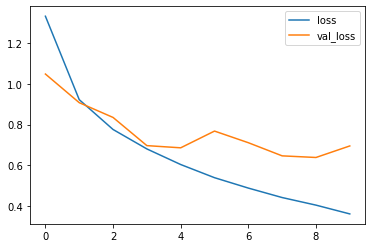

In [11]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

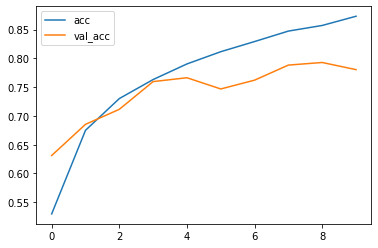

In [12]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()

In [13]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        9248  